In [57]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
import pandas as pd


data1 = pd.read_csv('../data/Turbine1.csv', sep=";")
data2 = pd.read_csv('../data/Turbine2.csv', sep=";")

## Main conclusions of this notebook

### <span style='color:Orange'> <b> 1. It is 3 months data : January 2016 to March 2016 </b> </span>
### <span style='color:Orange'> <b> 2. Power is having few outliers (which has  <span style='color:Black'> negative value </b> and has very <span style='color:Black'> high value </span>
### <span style='color:Orange'> <b> 3 It is 3 months data : January 2016 to March 2016 </b> </span>
### <span style='color:Orange'> <b> 4. Power is less between 16 hour and 19h </b> </span>
### <span style='color:Blue'> <b> 5. Higher values of Power (can be interpreted as <span style='color:Black'> Anomalies </span> ) is occuring at the time frames (BtrStd 2): 46270, 46297, 46258, 46050, 46397, 46863, 46013, 46260, 46256, 46554  </b> </span>
### <span style='color:Blue'> <b> 6. Negative Power  (can be interpreted as <span style='color:Black'> Anomalies </span> ) is occuring at the time frames (BtrStd 1): 49205, 48595, 49041, 49032, 49243, 49270, 48596, 48991, 48599, 49265, 49341, 49430, 49136, 48776, 49330, 49206, 48377, 48846, 49188, 49129, 49239, 49145, 49238, 48580, 49137, 49316, 49242  </b> </span>

## Data Preprocessing

In [2]:
data1.rename(columns=lambda x: x.strip(), inplace=True)

In [3]:
data2.rename(columns=lambda x: x.strip(), inplace=True)

In [6]:
data1["Dat/Zeit"] = data1["Dat/Zeit"].replace(',', '', regex=True)

data1["time"] = pd.to_datetime(data1["Dat/Zeit"], dayfirst=True, errors="coerce")
data1["date"]= data1["time"].dt.date
data1["hour"] = data1["time"].dt.hour
data1["weekday"] = data1["time"].dt.weekday
data1["min"] = data1["time"].dt.minute
data1["day"] = data1["time"].dt.day
data1["month"] = data1["time"].dt.month
data1["min"] = data1["time"].dt.minute

In [7]:
print(min(data1.loc[1:,"date"]))
print(max(data1.loc[1:, "date"]))

2016-01-01
2016-03-31


In [9]:
data2["Dat/Zeit"] = data2["Dat/Zeit"].replace(',', '', regex=True)

data2["time"] = pd.to_datetime(data2["Dat/Zeit"], dayfirst=True, errors="coerce")
data2["date"]= data2["time"].dt.date
data2["hour"] = data2["time"].dt.hour
data2["weekday"] = data2["time"].dt.weekday
data2["min"] = data2["time"].dt.minute
data2["day"] = data2["time"].dt.day
data2["month"] = data2["time"].dt.month
data2["min"] = data2["time"].dt.minute

In [10]:
print(min(data2.loc[1:,"date"]))
print(max(data2.loc[1:, "date"]))

2016-01-01
2016-03-31


<span style='color:Orange'> <b> Conclusion: 3 months data : January 2016 to March 2016 </b> </span>

In [8]:
data1

,Dat/Zeit,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,...,KH-Ana-2,KH-Ana-3,KH-Ana-4,time,date,hour,weekday,min,day,month
0,,m/s,rpm,kW,°,kWh,kWh,h,h,°C,...,,,,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1,01.01.2016 00:10,"5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,2016-01-01 00:10:00,2016-01-01,0.0,4.0,10.0,1.0,1.0
2,01.01.2016 00:20,"5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,2016-01-01 00:20:00,2016-01-01,0.0,4.0,20.0,1.0,1.0
3,01.01.2016 00:30,"5,8",10,"272,1","160,6",31533151,5742983,48371,46008,"15,9",...,0,0,0,2016-01-01 00:30:00,2016-01-01,0.0,4.0,30.0,1.0,1.0
4,01.01.2016 00:40,"6,4",10,"320,1",162,31533151,5743039,48371,46008,"17,7",...,0,0,"0,,,,",2016-01-01 00:40:00,2016-01-01,0.0,4.0,40.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13099,31.03.2016 23:10,"5,2",10,"228,2","359,1",32300592,5866558,49430,46892,"16,2",...,0,0,"0,,,,,,",2016-03-31 23:10:00,2016-03-31,23.0,3.0,10.0,31.0,3.0
13100,31.03.2016 23:20,"5,3",10,"237,8","359,7",32300592,5866593,49430,46892,17,...,0,0,"0,,,,",2016-03-31 23:20:00,2016-03-31,23.0,3.0,20.0,31.0,3.0
13101,31.03.2016 23:30,"5,2",10,"209,9","0,3",32300592,5866632,49430,46892,17,...,0,0,"0,,,,",2016-03-31 23:30:00,2016-03-31,23.0,3.0,30.0,31.0,3.0
13102,31.03.2016 23:40,"5,2",10,"220,5",0,32300592,5866670,49430,46892,17,...,0,0,"0,,,,,",2016-03-31 23:40:00,2016-03-31,23.0,3.0,40.0,31.0,3.0


In [11]:
data2

,Dat/Zeit,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,...,KH-Ana-2,KH-Ana-3,KH-Ana-4,time,date,hour,weekday,min,day,month
0,,m/s,rpm,kW,°,kWh,kWh,h,h,°C,...,,,,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1,01.01.2016 00:10,"4,2",10,"139,3","161,7",33270717,1712034,48925,45171,"14,5",...,0,0,0,2016-01-01 00:10:00,2016-01-01,0.0,4.0,10.0,1.0,1.0
2,01.01.2016 00:20,"4,2",10,"139,3","161,7",33270717,1712034,48925,45171,"14,5",...,0,0,0,2016-01-01 00:20:00,2016-01-01,0.0,4.0,20.0,1.0,1.0
3,01.01.2016 00:30,"4,4",10,"162,1","160,8",33270717,1712059,48925,45171,14,...,0,0,0,2016-01-01 00:30:00,2016-01-01,0.0,4.0,30.0,1.0,1.0
4,01.01.2016 00:40,"5,4",10,"265,1","161,3",33270717,1712105,48925,45171,"14,8",...,0,0,"0,",2016-01-01 00:40:00,2016-01-01,0.0,4.0,40.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13099,31.03.2016 23:10,"5,1",10,"229,8","356,1",34103533,1823091,50073,45943,"19,5",...,0,0,"0,,,,",2016-03-31 23:10:00,2016-03-31,23.0,3.0,10.0,31.0,3.0
13100,31.03.2016 23:20,"5,1",10,"226,4","355,8",34103533,1823136,50073,45943,20,...,0,0,"0,,,,",2016-03-31 23:20:00,2016-03-31,23.0,3.0,20.0,31.0,3.0
13101,31.03.2016 23:30,"5,4",10,"254,3","355,4",34103533,1823175,50073,45943,20,...,0,0,"0,,,,,",2016-03-31 23:30:00,2016-03-31,23.0,3.0,30.0,31.0,3.0
13102,31.03.2016 23:40,"5,4",10,"240,9",359,34103533,1823215,50073,45943,20,...,0,0,"0,,,,,,,",2016-03-31 23:40:00,2016-03-31,23.0,3.0,40.0,31.0,3.0


In [12]:
data_new_1 = data1.loc[1:, :]

In [13]:
data_new_2 = data2.loc[1:, :]

In [14]:
data_new_1

,Dat/Zeit,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,...,KH-Ana-2,KH-Ana-3,KH-Ana-4,time,date,hour,weekday,min,day,month
1,01.01.2016 00:10,"5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,2016-01-01 00:10:00,2016-01-01,0.0,4.0,10.0,1.0,1.0
2,01.01.2016 00:20,"5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,2016-01-01 00:20:00,2016-01-01,0.0,4.0,20.0,1.0,1.0
3,01.01.2016 00:30,"5,8",10,"272,1","160,6",31533151,5742983,48371,46008,"15,9",...,0,0,0,2016-01-01 00:30:00,2016-01-01,0.0,4.0,30.0,1.0,1.0
4,01.01.2016 00:40,"6,4",10,"320,1",162,31533151,5743039,48371,46008,"17,7",...,0,0,"0,,,,",2016-01-01 00:40:00,2016-01-01,0.0,4.0,40.0,1.0,1.0
5,01.01.2016 00:50,"6,9","14,5","457,4","161,1",31533206,5743049,48371,46008,20,...,0,0,"0,",2016-01-01 00:50:00,2016-01-01,0.0,4.0,50.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13099,31.03.2016 23:10,"5,2",10,"228,2","359,1",32300592,5866558,49430,46892,"16,2",...,0,0,"0,,,,,,",2016-03-31 23:10:00,2016-03-31,23.0,3.0,10.0,31.0,3.0
13100,31.03.2016 23:20,"5,3",10,"237,8","359,7",32300592,5866593,49430,46892,17,...,0,0,"0,,,,",2016-03-31 23:20:00,2016-03-31,23.0,3.0,20.0,31.0,3.0
13101,31.03.2016 23:30,"5,2",10,"209,9","0,3",32300592,5866632,49430,46892,17,...,0,0,"0,,,,",2016-03-31 23:30:00,2016-03-31,23.0,3.0,30.0,31.0,3.0
13102,31.03.2016 23:40,"5,2",10,"220,5",0,32300592,5866670,49430,46892,17,...,0,0,"0,,,,,",2016-03-31 23:40:00,2016-03-31,23.0,3.0,40.0,31.0,3.0


In [15]:
data_new_2

,Dat/Zeit,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,...,KH-Ana-2,KH-Ana-3,KH-Ana-4,time,date,hour,weekday,min,day,month
1,01.01.2016 00:10,"4,2",10,"139,3","161,7",33270717,1712034,48925,45171,"14,5",...,0,0,0,2016-01-01 00:10:00,2016-01-01,0.0,4.0,10.0,1.0,1.0
2,01.01.2016 00:20,"4,2",10,"139,3","161,7",33270717,1712034,48925,45171,"14,5",...,0,0,0,2016-01-01 00:20:00,2016-01-01,0.0,4.0,20.0,1.0,1.0
3,01.01.2016 00:30,"4,4",10,"162,1","160,8",33270717,1712059,48925,45171,14,...,0,0,0,2016-01-01 00:30:00,2016-01-01,0.0,4.0,30.0,1.0,1.0
4,01.01.2016 00:40,"5,4",10,"265,1","161,3",33270717,1712105,48925,45171,"14,8",...,0,0,"0,",2016-01-01 00:40:00,2016-01-01,0.0,4.0,40.0,1.0,1.0
5,01.01.2016 00:50,"5,3",10,"283,8","161,2",33270717,1712147,48925,45172,17,...,0,0,"0,,",2016-01-01 00:50:00,2016-01-01,0.0,4.0,50.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13099,31.03.2016 23:10,"5,1",10,"229,8","356,1",34103533,1823091,50073,45943,"19,5",...,0,0,"0,,,,",2016-03-31 23:10:00,2016-03-31,23.0,3.0,10.0,31.0,3.0
13100,31.03.2016 23:20,"5,1",10,"226,4","355,8",34103533,1823136,50073,45943,20,...,0,0,"0,,,,",2016-03-31 23:20:00,2016-03-31,23.0,3.0,20.0,31.0,3.0
13101,31.03.2016 23:30,"5,4",10,"254,3","355,4",34103533,1823175,50073,45943,20,...,0,0,"0,,,,,",2016-03-31 23:30:00,2016-03-31,23.0,3.0,30.0,31.0,3.0
13102,31.03.2016 23:40,"5,4",10,"240,9",359,34103533,1823215,50073,45943,20,...,0,0,"0,,,,,,,",2016-03-31 23:40:00,2016-03-31,23.0,3.0,40.0,31.0,3.0


In [16]:
data_new_1.sort_values(by=['time'], inplace=True)

C:\Users\ridgar1\AppData\Local\Temp\ipykernel_24328\2059965022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_1.sort_values(by=['time'], inplace=True)


In [17]:
data_new_2.sort_values(by=['time'], inplace=True)

C:\Users\ridgar1\AppData\Local\Temp\ipykernel_24328\3214561398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_2.sort_values(by=['time'], inplace=True)


In [19]:
data_new_1 = data_new_1.replace(',', '.', regex=True)
data_new_2 = data_new_2.replace(',', '.', regex=True)

In [20]:
data_new_1.columns

Index(['Dat/Zeit', 'Wind', 'Rotor', 'Leistung', 'Azimut', 'Prod. 1', 'Prod. 2',
       'BtrStd 1', 'BtrStd 2', 'Gen1-', 'Lager', 'Außen', 'GetrT', 'Status',
       'Spann', 'Spann.1', 'Spann.2', 'Strom-', 'Strom-.1', 'Strom-.2',
       'CosPh', 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE',
       'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', 'KH-Ana-4', 'time',
       'date', 'hour', 'weekday', 'min', 'day', 'month'],
      dtype='object')

In [21]:
cols_list = ["Wind","Rotor", 'Azimut', 'Prod. 1', 'Prod. 2', 'BtrStd 1', 'BtrStd 2',  "Gen1-", "Lager", 'Außen', "GetrT", "Spann", "Spann.1", "Spann.2", 'Strom-', 'Strom-.1', 'Strom-.2',
       'CosPh', 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE', 'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', "Leistung"]
data_new_1[cols_list] = data_new_1[cols_list].apply(pd.to_numeric)

In [22]:
data_new_2[cols_list] = data_new_2[cols_list].apply(pd.to_numeric)

## Data Analysis

In [23]:
data_new_1["BtrStd 1"].value_counts()

48599    381
48596    340
49041    336
48595    311
49206    305
        ... 
49323      5
49154      5
48695      5
49146      5
48575      4
Name: BtrStd 1, Length: 1059, dtype: int64

In [24]:
data_new_2["BtrStd 1"].value_counts()

49631    367
49143    355
49135    323
49861    294
49826    247
        ... 
49077      1
49605      1
49093      1
49641      1
48999      1
Name: BtrStd 1, Length: 1116, dtype: int64

### Power Analysis

In [26]:
print("Mean of power", data_new_1["Leistung"].mean())
print("Min of power", data_new_1["Leistung"].min())
print("Max of power", data_new_1["Leistung"].max())

Mean of power 407.7584675265206
Min of power -12.6
Min of power 2111.2


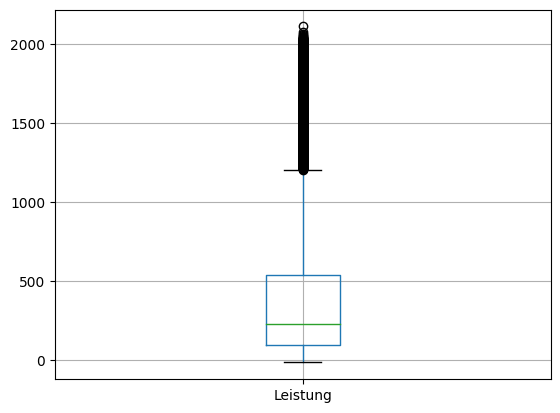

In [27]:
boxplot = data_new_1.boxplot(column=["Leistung"])

<span style='color:Orange'> <b> Conclusion: Power is having few outliers (which has  <span style='color:Black'> negative value </span> and has very <span style='color:Black'> high value </span>) </b> </span>

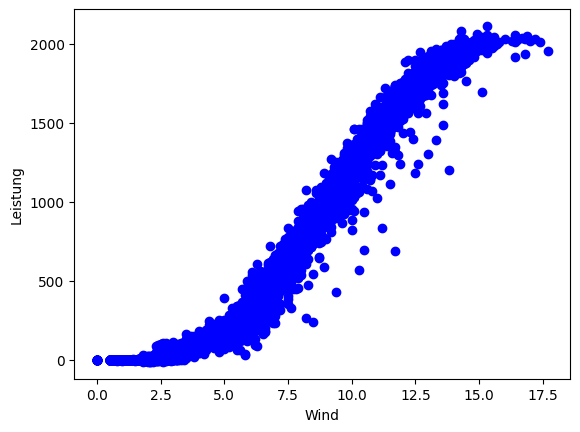

In [32]:
## Power Analysis according to Wind
plt.scatter(data_new_1["Wind"], data_new_1["Leistung"], color="Blue")
plt.xlabel("Wind")
plt.ylabel("Leistung")
plt.show()

<span style='color:Orange'> <b> Conclusion: Wind is highly correlated to Power generation </b> </span>

### Power Analysis with time

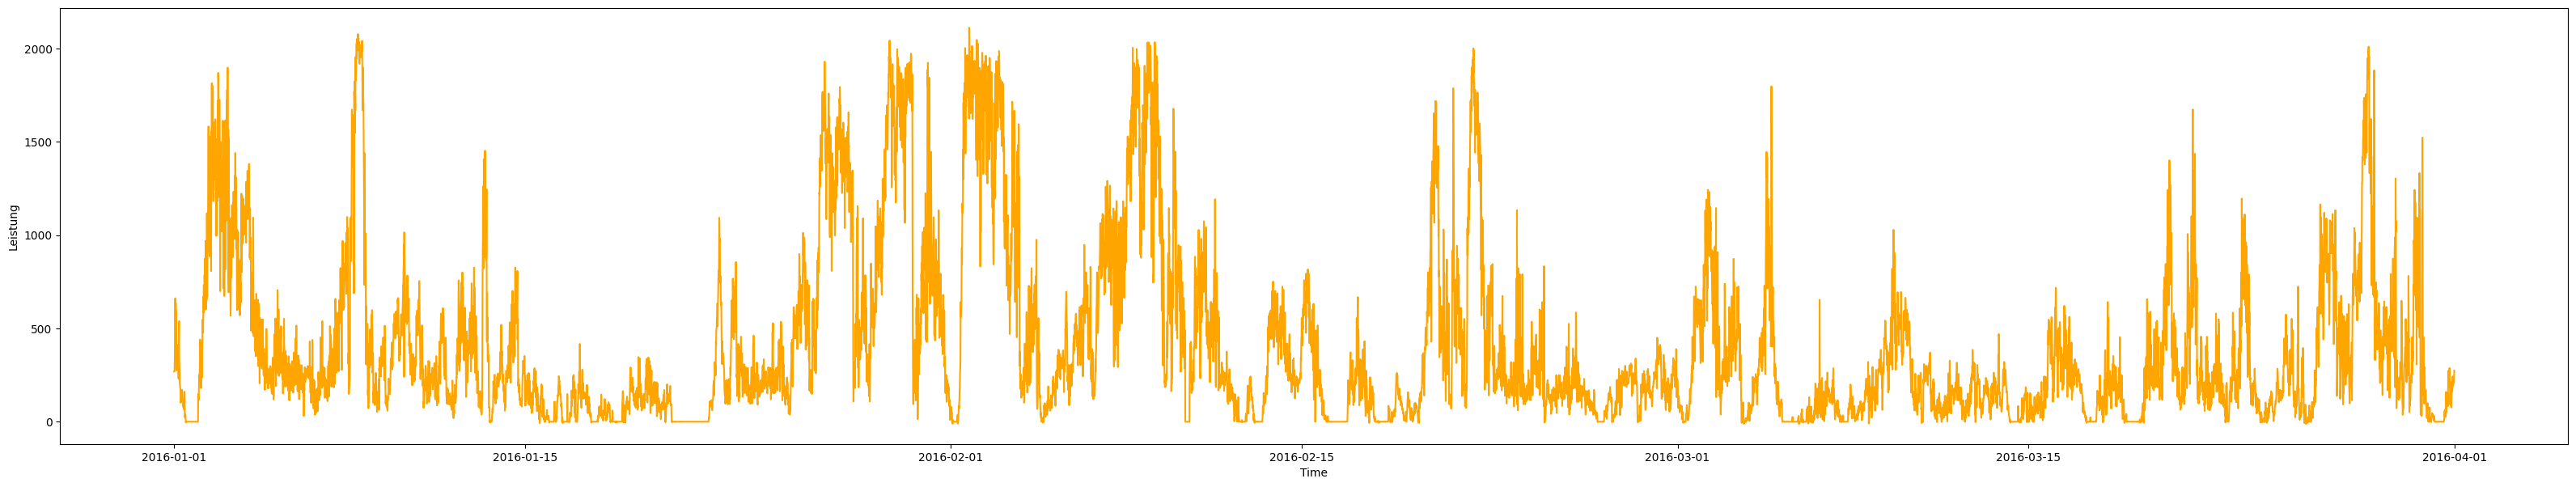

In [34]:
plt.figure(figsize=(40,7))
plt.plot(data_new_1["time"], data_new_1["Leistung"], color="Orange")
plt.xlabel("Time")
plt.ylabel("Leistung")
plt.show()

### Plotting Wind and Leistung with time

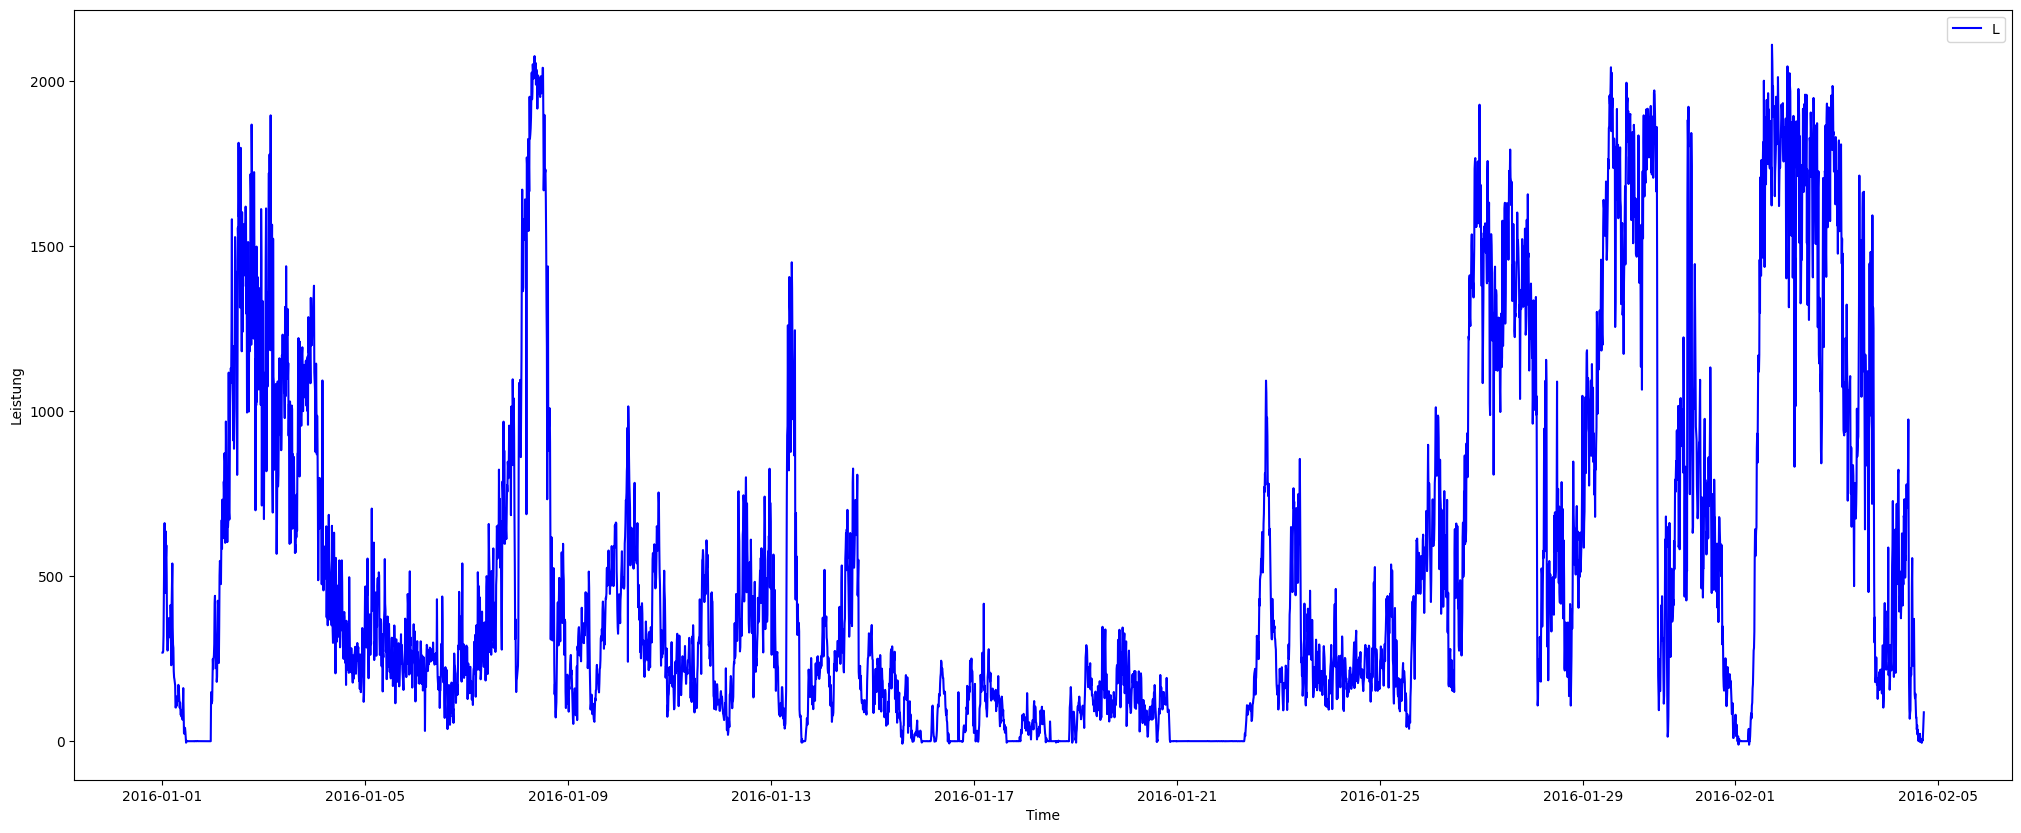

<Figure size 2500x1000 with 0 Axes>

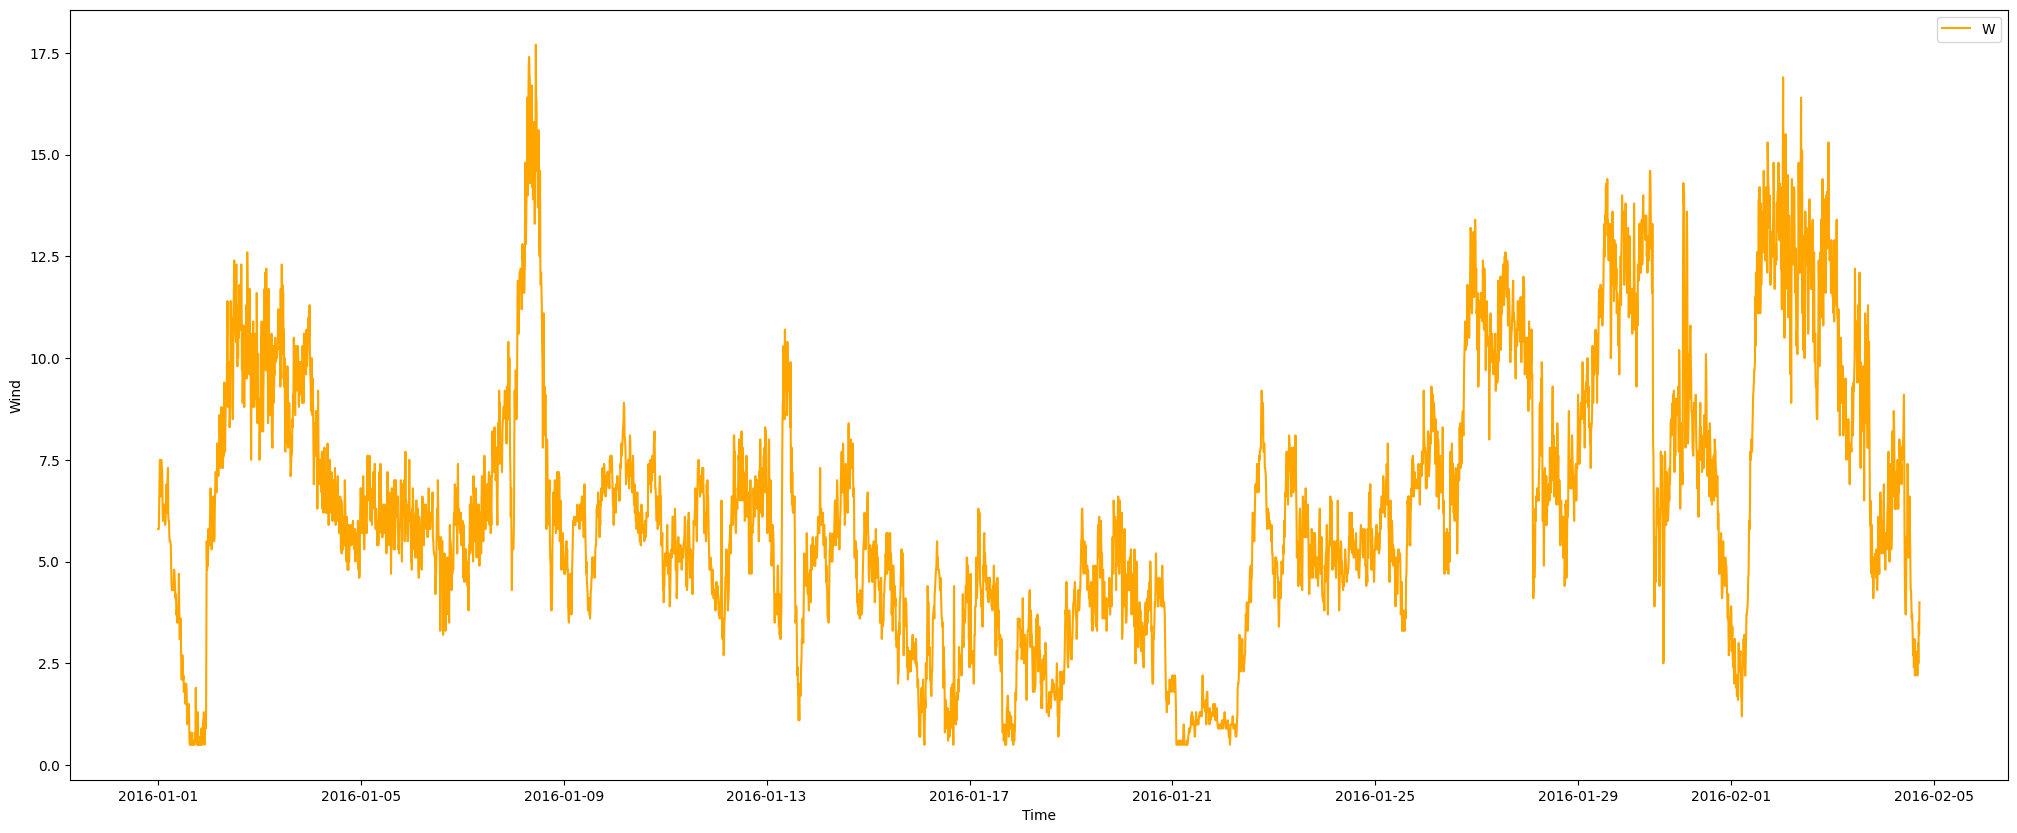

In [39]:
plt.figure(figsize=(25,10))
plt.plot(data_new_1["time"][0:5000], data_new_1["Leistung"][0:5000], color="Blue")
plt.xlabel("Time")
plt.ylabel("Leistung")
plt.legend("Leistung")
plt.show()
plt.figure(figsize=(25,10))
plt.figure(figsize=(25,10))
plt.plot(data_new_1["time"][0:5000], data_new_1["Wind"][0:5000], color="orange")
plt.xlabel("Time")
plt.ylabel("Wind")
plt.legend("Wind")
plt.show()

In [40]:
## Power by hours 
power_mean_hourly = data_new_1.groupby("hour").mean()["Leistung"]
# item_count_hourly = data1.groupby("hour").sum()["ITEM_COUNT"]

power_mean_hourly

C:\Users\ridgar1\AppData\Local\Temp\ipykernel_24328\2622689834.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  power_mean_hourly = data_new_1.groupby("hour").mean()["Leistung"]


hour
0.0     386.157615
1.0     421.224908
2.0     414.390110
3.0     423.156044
4.0     401.419048
5.0     424.463919
6.0     419.179670
7.0     404.010989
8.0     416.009341
9.0     417.194505
10.0    418.100733
11.0    412.345238
12.0    415.767766
13.0    414.711538
14.0    404.630403
15.0    412.906960
16.0    384.504396
17.0    388.227106
18.0    385.241575
19.0    401.209158
20.0    406.169048
21.0    422.511905
22.0    405.760623
23.0    386.871062
Name: Leistung, dtype: float64

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
24


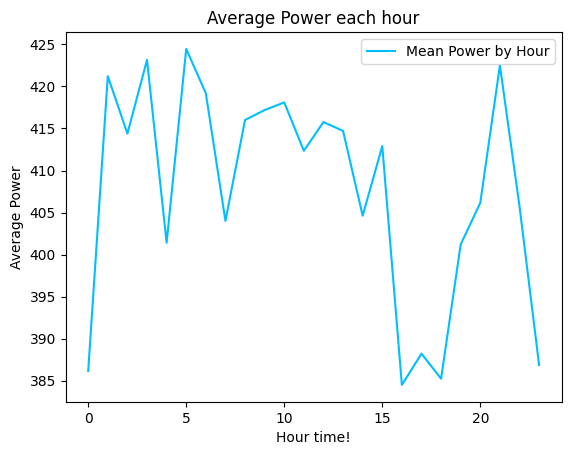

In [47]:
hour_idx = [i for i, _ in enumerate(data_new_1.hour.dropna().unique())]

print(hour_idx)
print(len(power_mean_hourly))

plt.plot(hour_idx, power_mean_hourly, color="deepskyblue")
# plt.plot(hour_idx, item_count_hourly)
plt.legend(["Mean Power by Hour"])
## order from 4th hour of day starts and end at 22nd, thats why from 4 to 22.
# plt.xticks(hour_idx, ["4","5", "6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22"])
plt.xlabel("Hour time!")
plt.ylabel("Average Power")
plt.title("Average Power each hour")
plt.show()

<span style='color:Orange'> <b> Conclusion: Power is less between 16h to 19h </b> </span>

In [48]:
power_mean_weekday = data_new_1.groupby("weekday").mean()["Leistung"]

power_mean_weekday

C:\Users\ridgar1\AppData\Local\Temp\ipykernel_24328\3488632884.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  power_mean_weekday = data_new_1.groupby("weekday").mean()["Leistung"]


weekday
0.0    502.688301
1.0    436.165491
2.0    461.918803
3.0    238.781357
4.0    356.966916
5.0    394.424786
6.0    463.336485
Name: Leistung, dtype: float64

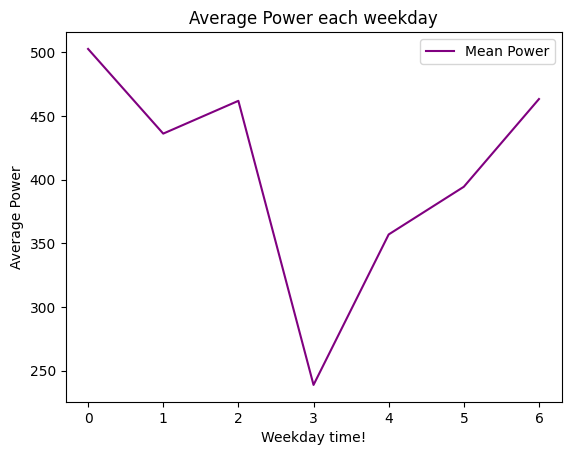

In [51]:
week_idx = [i for i, _ in enumerate(data_new_1.weekday.dropna().unique())]


plt.plot(week_idx, power_mean_weekday, color = "purple")
plt.legend(["Mean Power"])
plt.xlabel("Weekday time!")
plt.ylabel("Average Power")
plt.title("Average Power each weekday")
plt.show()

### <span style='color:Blue'> ANOMALY:  Higher Power Analysis </span>

In [58]:
leistung_arr = data_new_1["Leistung"].to_numpy()
mean = np.mean(leistung_arr)
std = np.std(leistung_arr)
threshold = 3 
outliers = np.where(np.abs(leistung_arr - mean) > threshold * std)
print(outliers[0])
print(len(outliers[0]))

[  216   222   253   307  1038  1042  1043  1044  1045  1046  1047  1048
  1049  1050  1051  1052  1053  1054  1055  1056  1057  1058  1059  1060
  1061  1062  1063  1064  1065  1066  1067  1068  1069  1070  1071  1072
  1073  1074  1075  1076  1077  1078  1079  1080  1081  1084  3738  3825
  4105  4106  4107  4108  4109  4110  4111  4112  4113  4114  4115  4116
  4120  4121  4122  4128  4131  4137  4154  4155  4156  4157  4158  4159
  4160  4165  4166  4170  4171  4172  4173  4176  4177  4189  4203  4204
  4207  4210  4211  4214  4215  4216  4217  4218  4220  4221  4222  4223
  4224  4228  4230  4232  4233  4234  4235  4236  4237  4238  4241  4329
  4330  4331  4339  4543  4545  4549  4552  4553  4554  4555  4557  4558
  4559  4560  4563  4564  4568  4569  4570  4571  4572  4573  4574  4575
  4579  4580  4581  4582  4583  4584  4585  4586  4587  4593  4594  4595
  4596  4597  4598  4599  4600  4602  4603  4604  4605  4607  4610  4611
  4612  4613  4614  4615  4618  4619  4620  4624  4

In [60]:
data_higher_leistung = data_new_1.loc[outliers[0], :]

In [61]:
data_higher_leistung["weekday"].value_counts()

0.0    103
1.0     76
4.0     74
5.0     31
6.0     18
2.0      3
Name: weekday, dtype: int64

In [62]:
data_higher_leistung["BtrStd 2"].value_counts()

46270    104
46297     63
46258     59
46050     42
46397     13
46863     13
46013      4
46260      4
46256      2
46554      1
Name: BtrStd 2, dtype: int64

In [63]:
data_new_1["BtrStd 2"].value_counts()

46013    459
46297    402
46270    348
46258    340
46863    256
        ... 
46094      5
46089      5
46465      5
46469      5
46892      5
Name: BtrStd 2, Length: 885, dtype: int64

In [71]:
data_higher_leistung["BtrStd 2"].value_counts().index.to_list()

[46270, 46297, 46258, 46050, 46397, 46863, 46013, 46260, 46256, 46554]

<span style='color:Orange'> <b> Conclusion: Higher Power is occuring at the time frames (BtrStd 2): 46270, 46297, 46258, 46050, 46397, 46863, 46013, 46260, 46256, 46554  </b> </span>

In [73]:
len(cols_list)

28

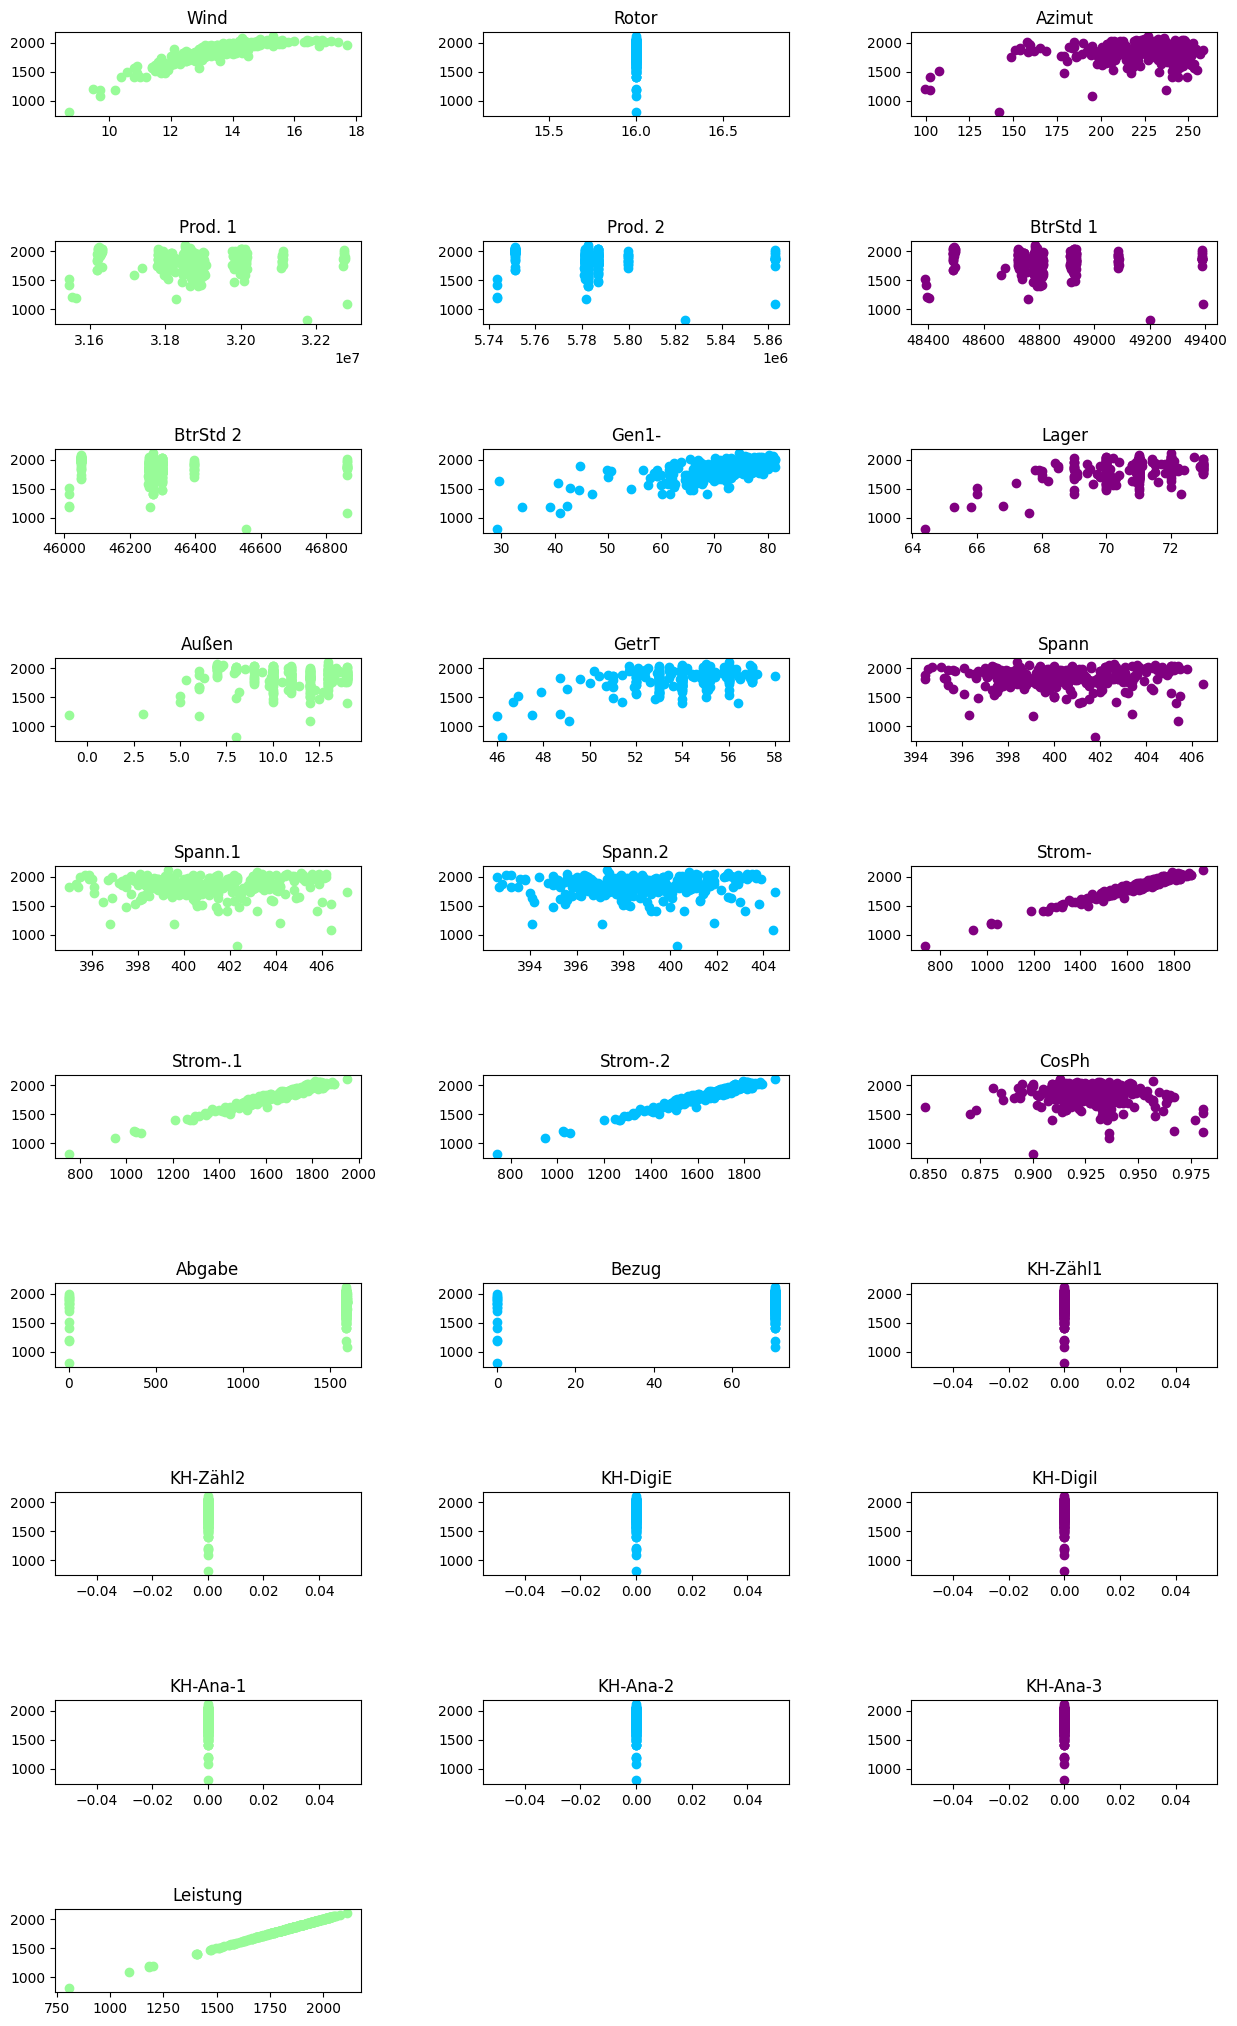

In [101]:
import matplotlib.pyplot as plt
color = ['palegreen', 'deepskyblue', 'purple']

# fig, ax = plt.subplots(10, 3)

i = 1
j = 0
color_idx = 0

fig = plt.figure(figsize=(15, 20))

for col in cols_list:       
       ax = fig.add_subplot(10,3,i)
       ax.scatter(data_higher_leistung[col], data_higher_leistung["Leistung"], color= color[color_idx])
       ax.set_title(col)
       i = i +1
       color_idx +=1
       
       if color_idx == 3:
              color_idx = 0
       # ax.show()

# add spacing between subplots
# fig.tight_layout()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
plt.show()

### <span style='color:Blue'> ANOMALY: Negative Power Analysis </span>

In [102]:
data_leistung_negative = data_new_1[data_new_1["Leistung"]<0]

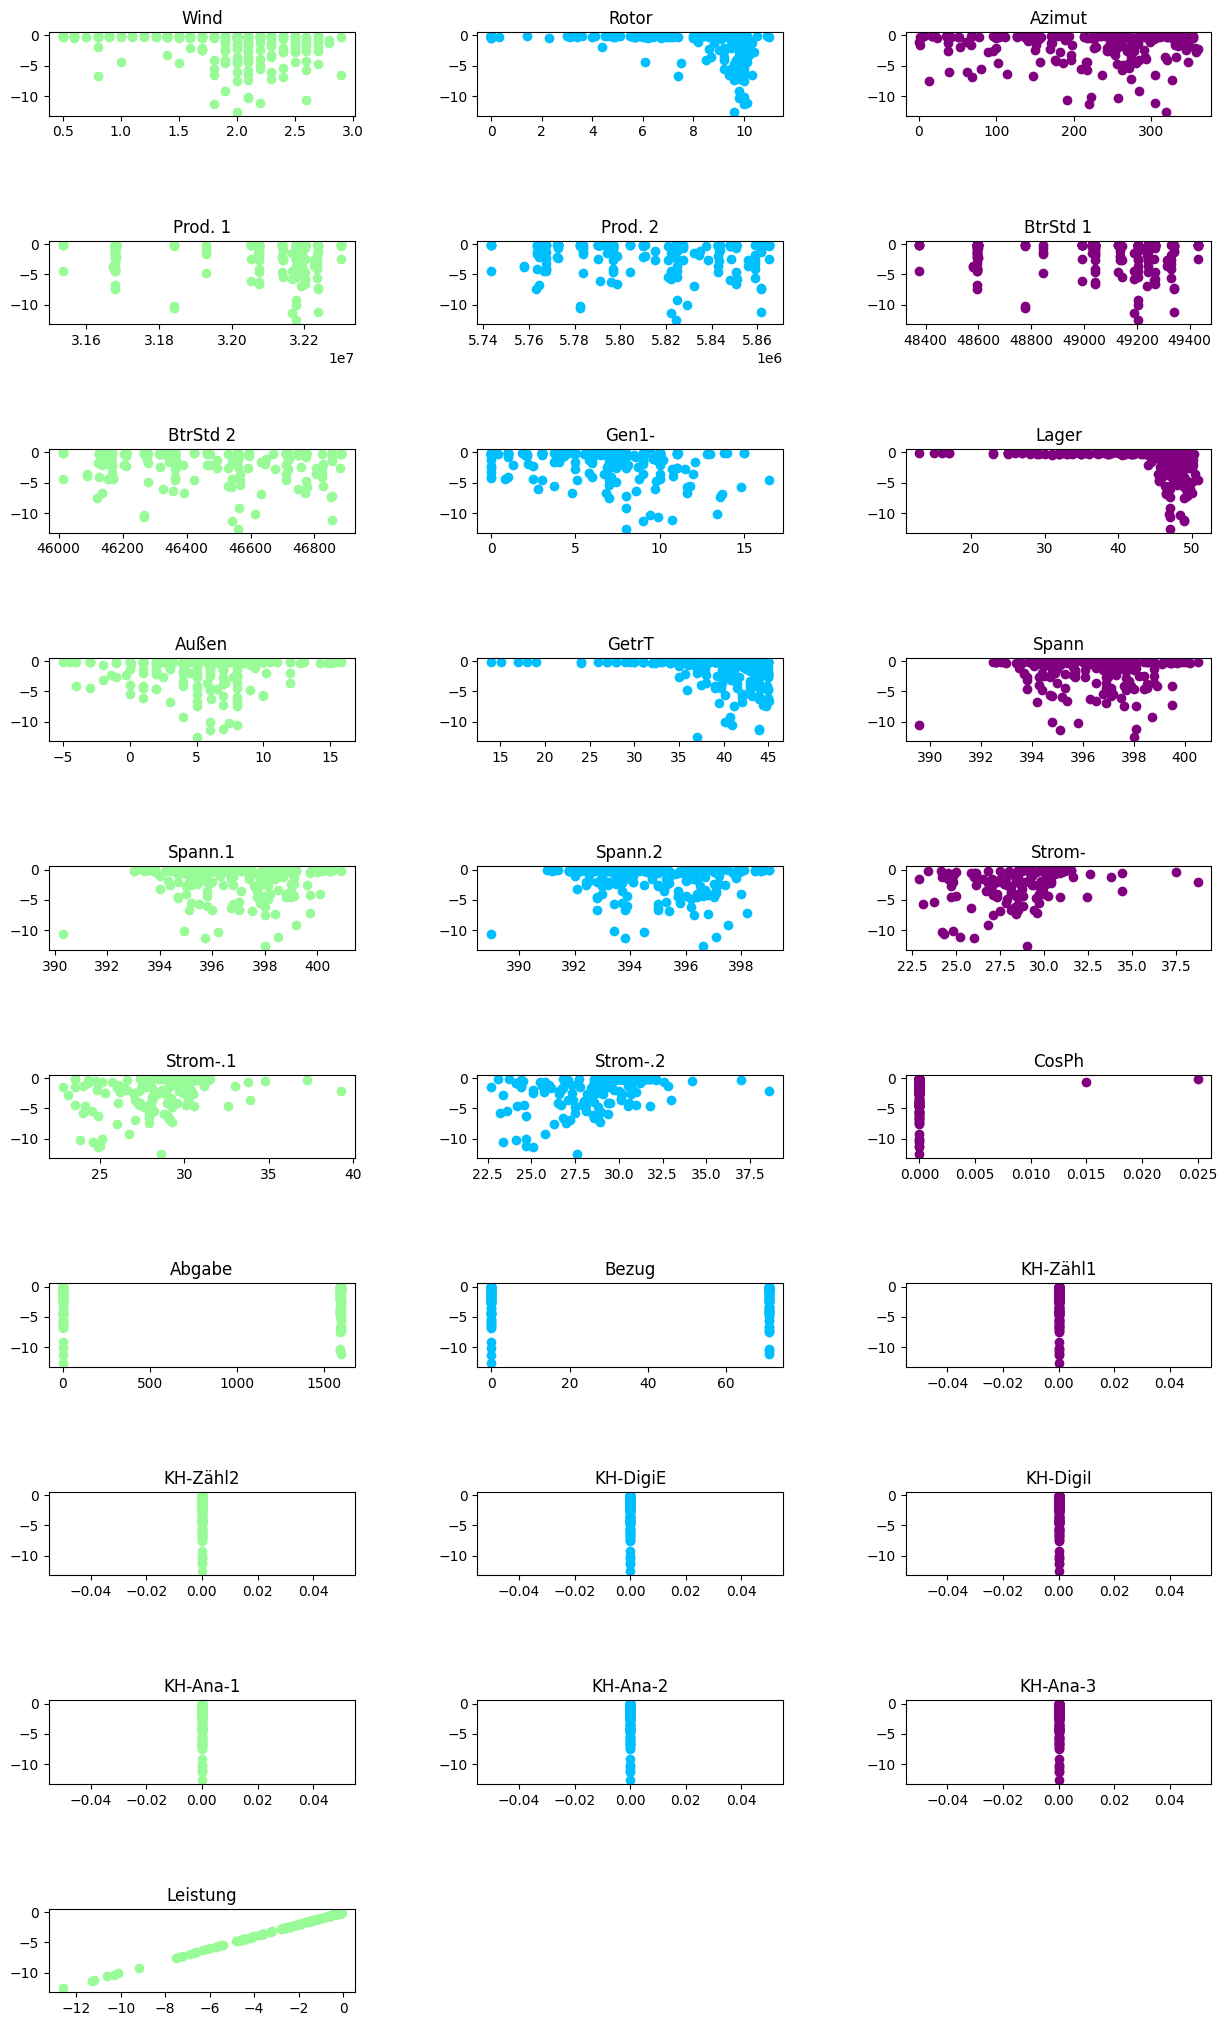

In [103]:
import matplotlib.pyplot as plt
color = ['palegreen', 'deepskyblue', 'purple']

# fig, ax = plt.subplots(10, 3)

i = 1
j = 0
color_idx = 0

fig = plt.figure(figsize=(15, 20))

for col in cols_list:       
       ax = fig.add_subplot(10,3,i)
       ax.scatter(data_leistung_negative[col], data_leistung_negative["Leistung"], color= color[color_idx])
       ax.set_title(col)
       i = i +1
       color_idx +=1
       
       if color_idx == 3:
              color_idx = 0
       # ax.show()

# add spacing between subplots
# fig.tight_layout()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
plt.show()

In [104]:
data_leistung_negative["BtrStd 1"].value_counts()

49205    24
48595    19
49041    18
49032    15
49243    15
49270    14
48596    13
48991    12
48599    11
49265    10
49341     9
49430     7
49136     7
48776     6
49330     6
49206     5
48377     5
48846     5
49188     4
49129     4
49239     3
49145     3
49238     2
48580     2
49137     2
49316     2
49242     1
Name: BtrStd 1, dtype: int64

In [106]:
data_leistung_negative["BtrStd 1"].value_counts().index

Int64Index([49205, 48595, 49041, 49032, 49243, 49270, 48596, 48991, 48599,
            49265, 49341, 49430, 49136, 48776, 49330, 49206, 48377, 48846,
            49188, 49129, 49239, 49145, 49238, 48580, 49137, 49316, 49242],
           dtype='int64')

<span style='color:Orange'> <b> Conclusion: Negative Power is occuring at the time frames (BtrStd 1): 49205, 48595, 49041, 49032, 49243, 49270, 48596, 48991, 48599,
            49265, 49341, 49430, 49136, 48776, 49330, 49206, 48377, 48846,
            49188, 49129, 49239, 49145, 49238, 48580, 49137, 49316, 49242  </b> </span>

In [107]:
data_leistung_negative["Rotor"].value_counts()

0.0     50
10.0    37
9.8     25
9.5      8
9.2      7
10.1     6
9.6      5
9.4      5
9.7      5
8.8      4
9.9      4
6.2      3
6.1      3
5.7      3
10.3     2
8.0      2
8.2      2
8.1      2
7.1      2
6.7      2
10.2     2
3.4      2
8.4      2
8.6      2
5.6      2
3.1      2
7.4      2
9.3      1
4.8      1
10.9     1
8.5      1
3.6      1
0.3      1
5.5      1
10.5     1
5.1      1
4.0      1
2.3      1
4.6      1
9.0      1
4.9      1
8.7      1
11.0     1
4.5      1
4.1      1
6.6      1
6.9      1
1.4      1
7.5      1
3.0      1
10.4     1
9.1      1
6.0      1
6.4      1
4.4      1
5.8      1
7.0      1
5.9      1
7.2      1
8.9      1
Name: Rotor, dtype: int64

In [109]:
## Normal data Rotor analysis
data_new_1["Rotor"].value_counts()

16.0    5989
10.0    4900
0.0      648
9.8       71
9.9       42
        ... 
0.1        1
3.3        1
2.7        1
1.4        1
1.1        1
Name: Rotor, Length: 155, dtype: int64

<span style='color:Orange'> <b> Conclusion: Negative Power occurs mostly when rotor has speed around 10 or 11 and always below that  </b> </span>

In [110]:
data_leistung_negative["Lager"].value_counts()

49.0    19
48.0    14
47.0     9
46.0     7
50.0     6
        ..
40.7     1
32.2     1
44.7     1
40.5     1
38.6     1
Name: Lager, Length: 102, dtype: int64

In [111]:
data_new_1["Lager"].value_counts()

66.0    323
71.0    253
67.0    239
52.0    217
49.0    185
       ... 
23.1      1
21.3      1
37.7      1
20.3      1
30.2      1
Name: Lager, Length: 468, dtype: int64

<span style='color:Orange'> <b> Conclusion: Lager (temperatue) can be also be the reason for negative values of power.  </b> </span>